# Exploratory Data Analysis (EDA)

This exploratory analysis aims to investigate the relationship between Hepatitis C (Hep C) status (ranging from negative to cirrhosis) and liver function panel blood tests. The analysis will focus on examining the distribution of the Hepatitis C dataset and identifying correlations between the variables of Hepatitis C status and the liver function blood panel tests associated with each category. For reference, the categories associated with each number are as follows:

0: Hep C negative (this person does NOT have the Hepatitis C virus) 



1: Hep C positive (experiencing liver inflammation)



2: Hep C positive (fibrosis of the liver; progressing liver damage)



3: Hep C positive (cirrhosis of the liver; also known as end-stage liver failure)




In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from pandas.plotting import parallel_coordinates



In [2]:
df= pd.read_csv('HepC.csv')

In [3]:
print(df.head())
df.shape

        Category  Age Sex   ALB   ALT   AST   BIL    CHE   CREA   GGT  PROT
0  0=Blood Donor   32   m  38.5   7.7  22.1   7.5   6.93  106.0  12.1  69.0
1  0=Blood Donor   32   m  38.5  18.0  24.7   3.9  11.17   74.0  15.6  76.5
2  0=Blood Donor   32   m  46.9  36.2  52.6   6.1   8.84   86.0  33.2  79.3
3  0=Blood Donor   32   m  43.2  30.6  22.6  18.9   7.33   80.0  33.8  75.7
4  0=Blood Donor   32   m  39.2  32.6  24.8   9.6   9.15   76.0  29.9  68.7


(612, 11)

In [4]:
# Summary stats table for df
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Age,612.0,47.397059,10.047230,19.00,39.0000,47.000,54.000,77.00
ALB,612.0,41.650000,5.721926,14.90,38.8000,41.950,45.225,82.20
ALT,612.0,28.377124,25.470818,0.90,16.4000,22.950,32.925,325.30
AST,612.0,34.629902,33.010979,10.60,21.6000,25.850,32.825,324.00
BIL,612.0,11.004902,17.100164,0.80,5.2750,7.300,11.200,209.00
CHE,612.0,8.206487,2.193388,1.42,6.9375,8.265,9.600,16.41
CREA,612.0,81.258333,49.858320,8.00,67.0000,76.850,88.000,1079.10
GGT,612.0,39.295752,54.575007,4.50,15.7000,23.300,40.125,650.90
PROT,612.0,72.047549,5.391748,44.80,69.3000,72.200,75.400,90.00


In [5]:
# Filter for rows where 'Category' is '0=Blood Donor' or '0s=suspect Blood Donor'
HepC_negative = df[(df['Category'] == '0=Blood Donor') | (df['Category'] == '0s=suspect Blood Donor')]

# Display the filtered DataFrame for Hep C negative patients
print(HepC_negative)




                   Category  Age Sex   ALB    ALT    AST   BIL    CHE   CREA  \
0             0=Blood Donor   32   m  38.5    7.7   22.1   7.5   6.93  106.0   
1             0=Blood Donor   32   m  38.5   18.0   24.7   3.9  11.17   74.0   
2             0=Blood Donor   32   m  46.9   36.2   52.6   6.1   8.84   86.0   
3             0=Blood Donor   32   m  43.2   30.6   22.6  18.9   7.33   80.0   
4             0=Blood Donor   32   m  39.2   32.6   24.8   9.6   9.15   76.0   
..                      ...  ...  ..   ...    ...    ...   ...    ...    ...   
535  0s=suspect Blood Donor   49   m  21.6    9.5   10.6   2.4   3.75   64.0   
536  0s=suspect Blood Donor   55   m  47.3  208.8  130.6   0.8  14.80   76.0   
537  0s=suspect Blood Donor   71   m  14.9   19.7   95.2   9.8  13.30    9.0   
538  0s=suspect Blood Donor   74   m  20.3   22.8   43.0   5.7   4.91   52.0   
539  0s=suspect Blood Donor   59   f  19.3  325.3  146.6   6.9   5.33   32.0   

       GGT  PROT  
0     12.1  69.0  
1

In [6]:
# Filter for rows where 'Category' is not '0=Blood Donor' and not '0s=suspect Blood Donor'
HepC_positive = df[(df['Category'] != '0=Blood Donor') & (df['Category'] != '0s=suspect Blood Donor')]

# Display the filtered DataFrame
print(HepC_positive)
      

        Category  Age Sex   ALB    ALT    AST   BIL   CHE  CREA    GGT  PROT
540  1=Hepatitis   19   m  41.0   87.0   67.0  12.0  7.55  62.0   65.0  75.0
541  1=Hepatitis   23   m  47.0   38.9  164.2  17.0  7.09  79.3   90.4  70.1
542  1=Hepatitis   25   m  42.0   63.3  187.7  14.0  6.00  66.9   40.2  70.5
543  1=Hepatitis   27   m  45.0   10.5   37.8  10.0  8.77  55.2   35.9  74.5
544  1=Hepatitis   29   m  49.0   53.0   39.0  15.0  8.79  79.0   37.0  90.0
..           ...  ...  ..   ...    ...    ...   ...   ...   ...    ...   ...
607  3=Cirrhosis   62   f  32.0    5.9  110.3  50.0  5.57  55.7  650.9  68.5
608  3=Cirrhosis   64   f  24.0    2.9   44.4  20.0  1.54  63.0   35.9  71.3
609  3=Cirrhosis   64   f  29.0    3.5   99.0  48.0  1.66  66.7   64.2  82.0
610  3=Cirrhosis   46   f  33.0   39.0   62.0  20.0  3.56  52.0   50.0  71.0
611  3=Cirrhosis   59   f  36.0  100.0   80.0  12.0  9.07  67.0   34.0  68.0

[72 rows x 11 columns]


In [7]:
# Converting 'Category' column to string type 
df['Category'] = df['Category'].astype(str)

# Extracting numeric part from the 'Category' column
df['Category'] = df['Category'].str.extract('(\d+)').astype(float)

print(df)

     Category  Age Sex   ALB    ALT    AST   BIL    CHE   CREA    GGT  PROT
0         0.0   32   m  38.5    7.7   22.1   7.5   6.93  106.0   12.1  69.0
1         0.0   32   m  38.5   18.0   24.7   3.9  11.17   74.0   15.6  76.5
2         0.0   32   m  46.9   36.2   52.6   6.1   8.84   86.0   33.2  79.3
3         0.0   32   m  43.2   30.6   22.6  18.9   7.33   80.0   33.8  75.7
4         0.0   32   m  39.2   32.6   24.8   9.6   9.15   76.0   29.9  68.7
..        ...  ...  ..   ...    ...    ...   ...    ...    ...    ...   ...
607       3.0   62   f  32.0    5.9  110.3  50.0   5.57   55.7  650.9  68.5
608       3.0   64   f  24.0    2.9   44.4  20.0   1.54   63.0   35.9  71.3
609       3.0   64   f  29.0    3.5   99.0  48.0   1.66   66.7   64.2  82.0
610       3.0   46   f  33.0   39.0   62.0  20.0   3.56   52.0   50.0  71.0
611       3.0   59   f  36.0  100.0   80.0  12.0   9.07   67.0   34.0  68.0

[612 rows x 11 columns]


# Distribution of the Data


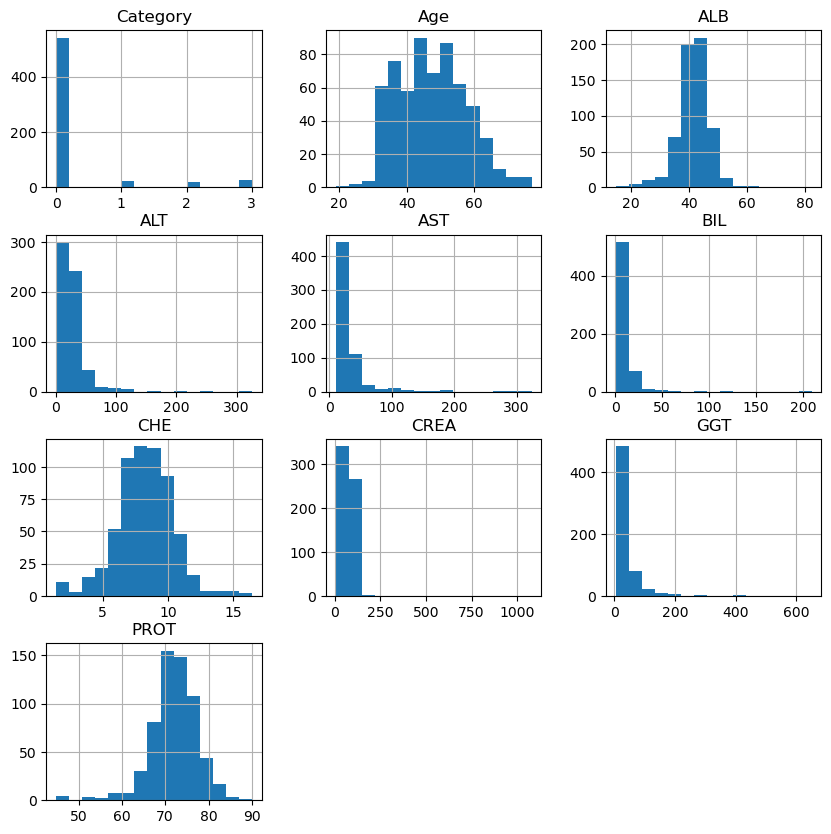

In [15]:
# Histograms for each variable in df
hist = df.hist(bins=15,figsize =(10,10))

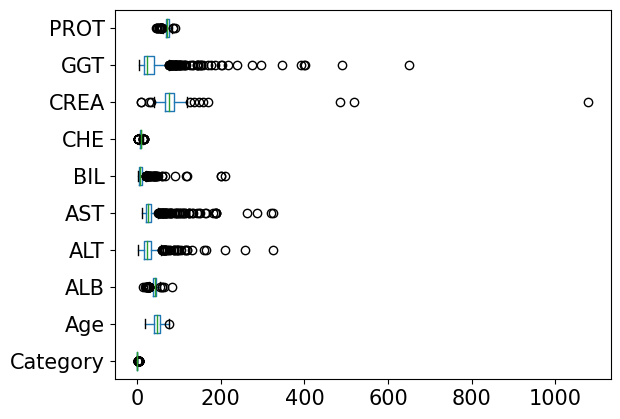

In [14]:
# Boxplot for every column in df
boxplot = df.boxplot(grid=False, vert=False, fontsize=15, patch_artist=False)
#Outliers seen in GGT and Crea

# Correlations in the Data


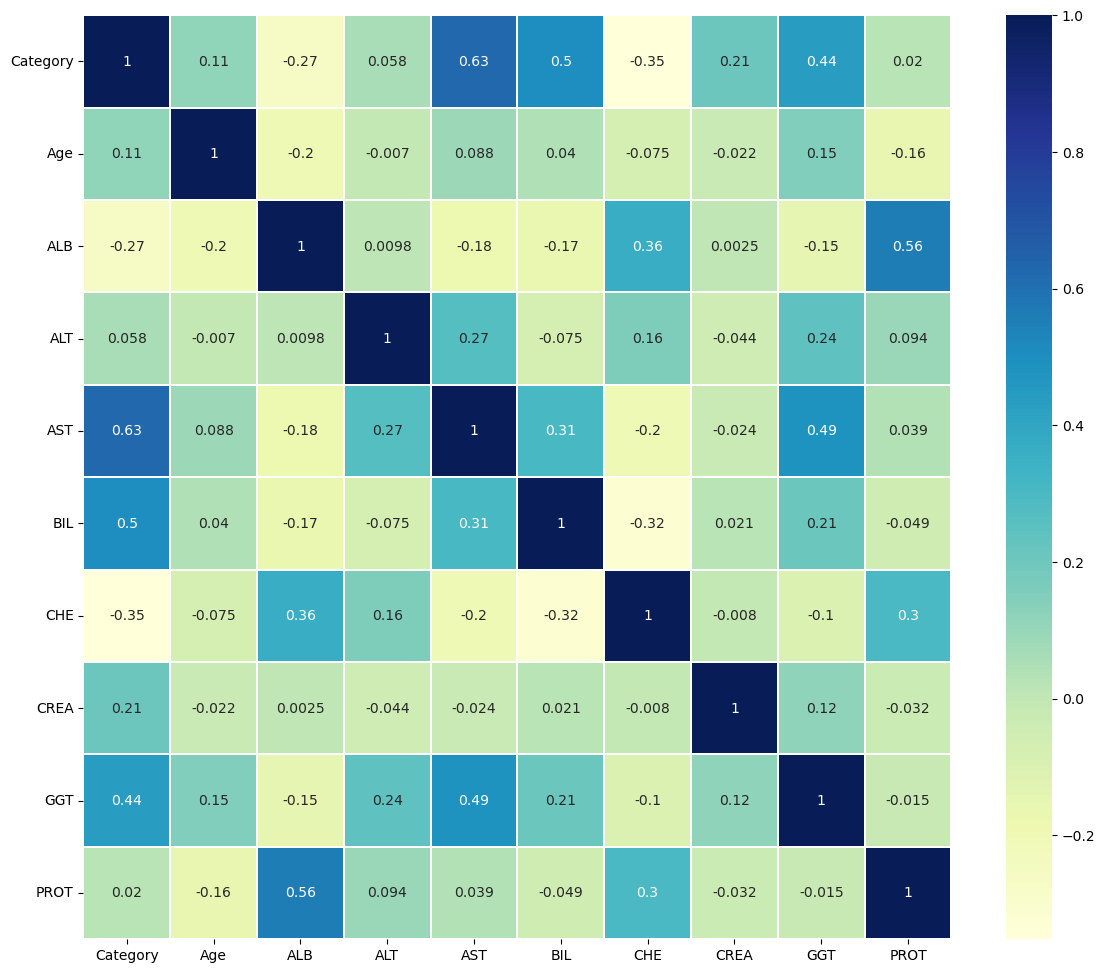

In [10]:
# Dropping the 'Sex' column from the DataFrame used for correlation matrix
df_corr = df.drop(columns=['Sex'])

# Creating the correlation matrix
corr_matrix = df_corr.corr()

# Creating the correlation matrix heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, linewidths=.1, cmap="YlGnBu", annot=True)
plt.yticks(rotation=0)
plt.show()

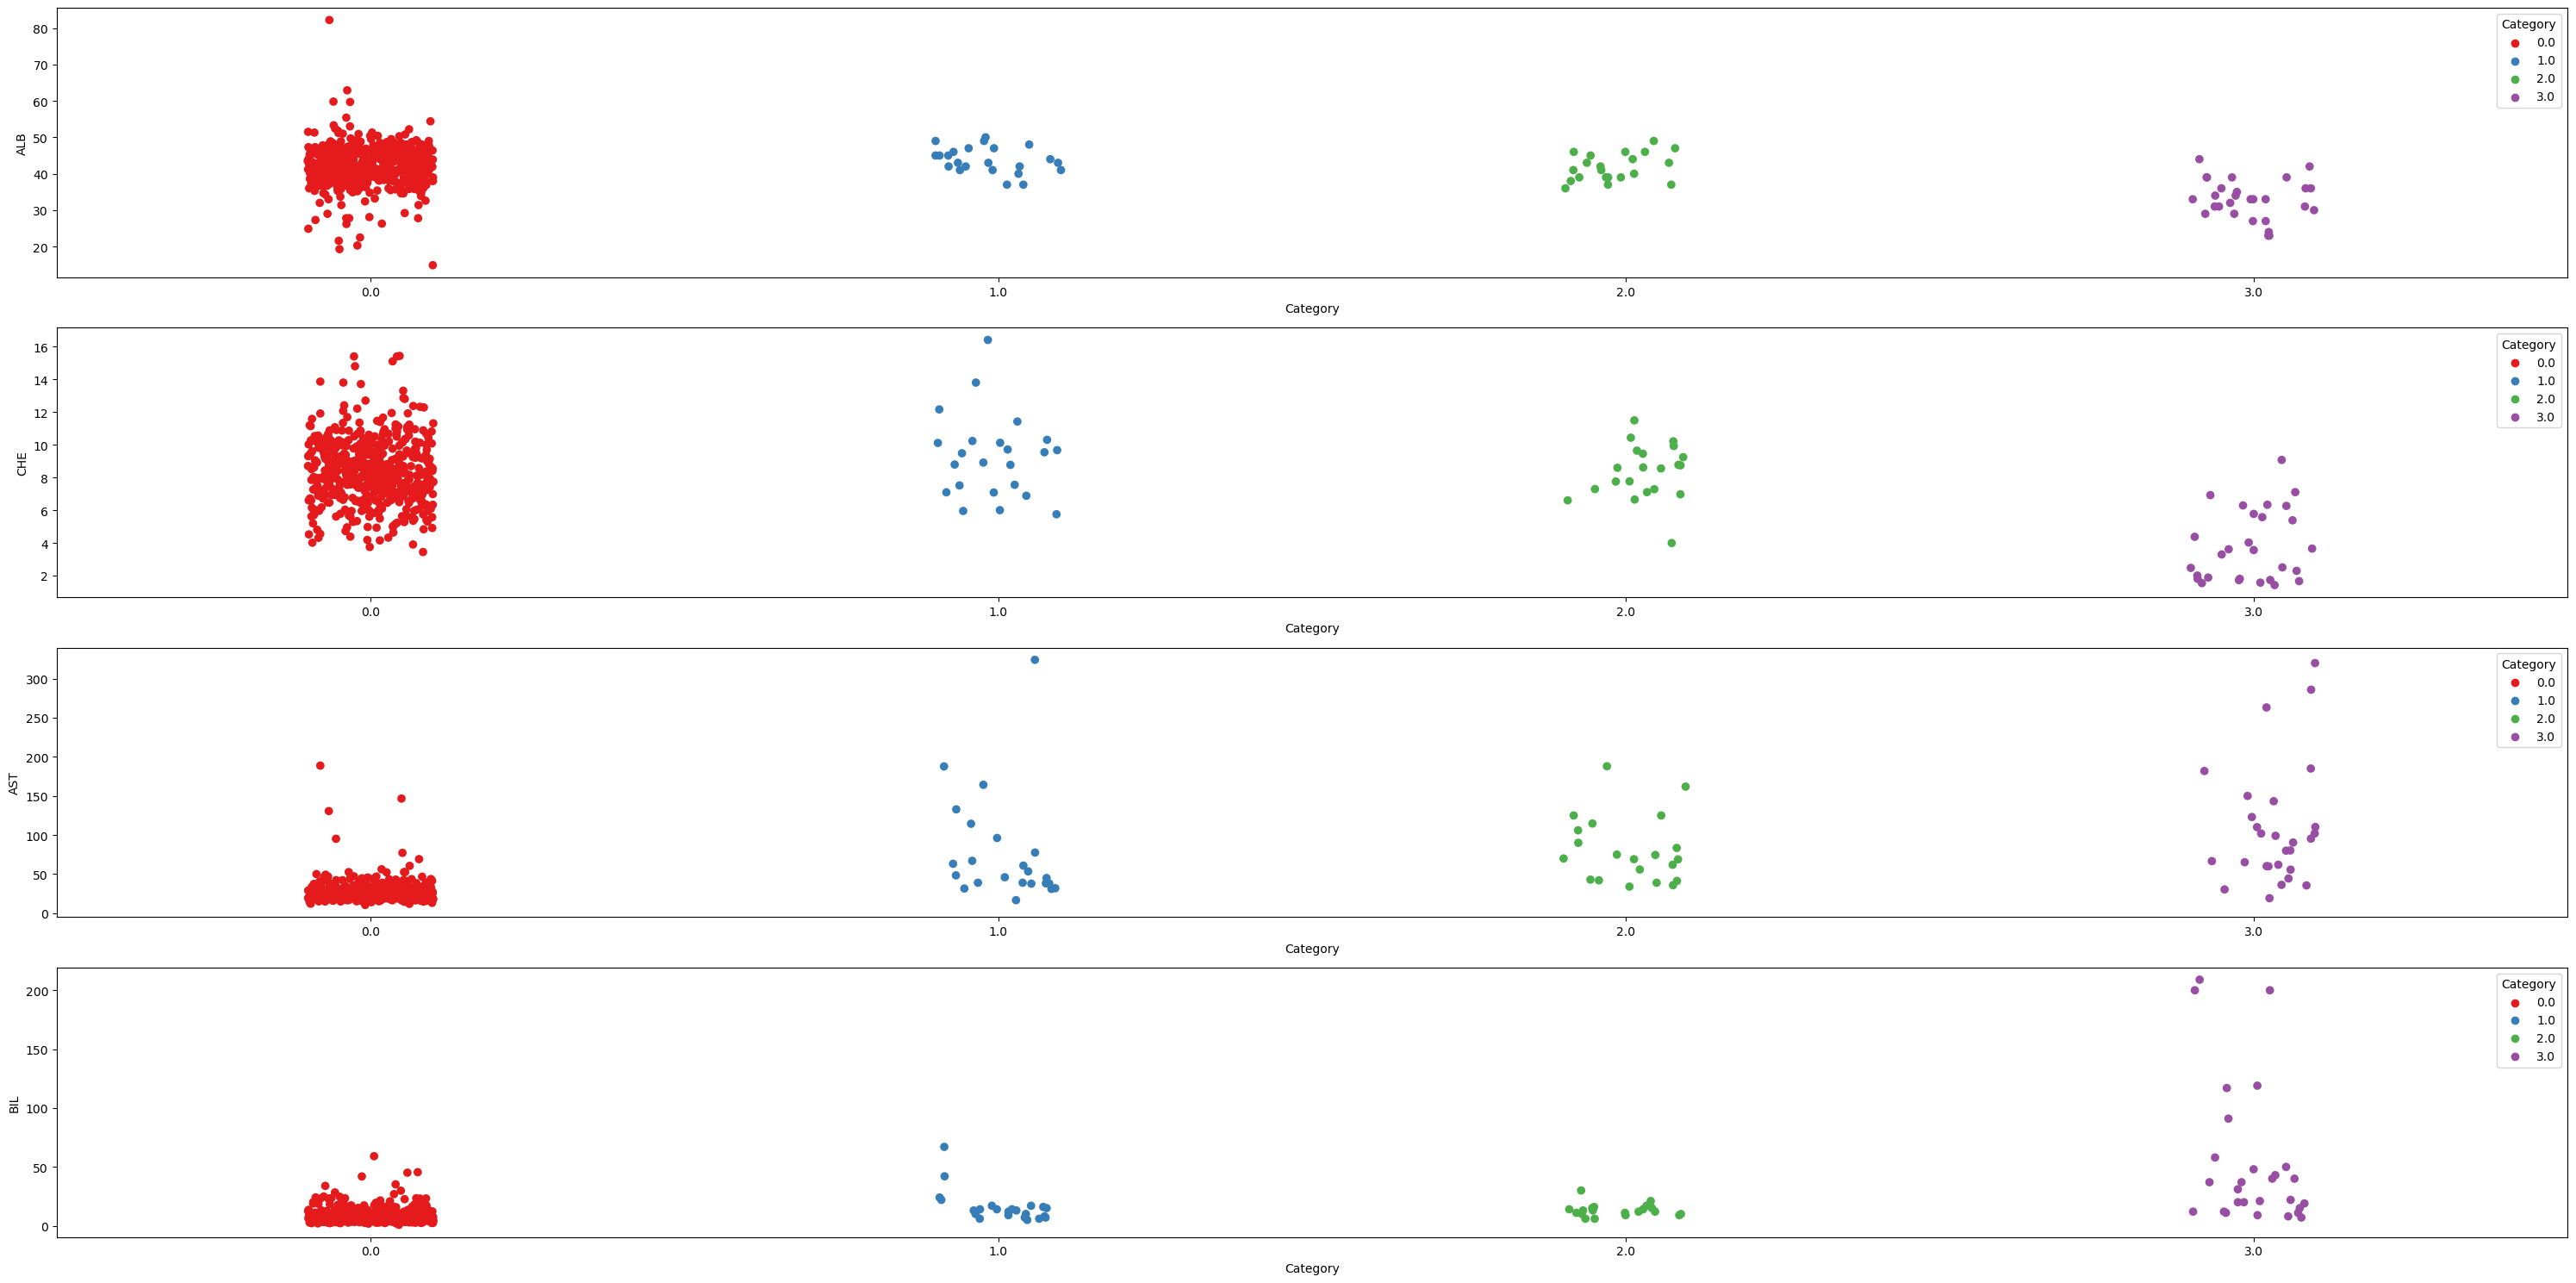

In [21]:
# Creating subplots using Matplotlib
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(30, 15))

# Stripp plots on each subplot
sns.stripplot(x='Category', y='ALB', data=df, size=7, ax=axes[0], palette= 'Set1', hue='Category')
axes[0]

sns.stripplot(x='Category', y='CHE', data=df, size=7,  ax=axes[1], palette= 'Set1',hue='Category')
axes[1]

sns.stripplot(x='Category', y='AST', data=df, size=7,  ax=axes[2], palette= 'Set1', hue='Category')
axes[2]

sns.stripplot(x='Category', y='BIL', data=df, size=7,  ax=axes[3], palette= 'Set1',hue='Category')
axes[3]

plt.tight_layout()
plt.show()





/Users/NaomiLopez/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


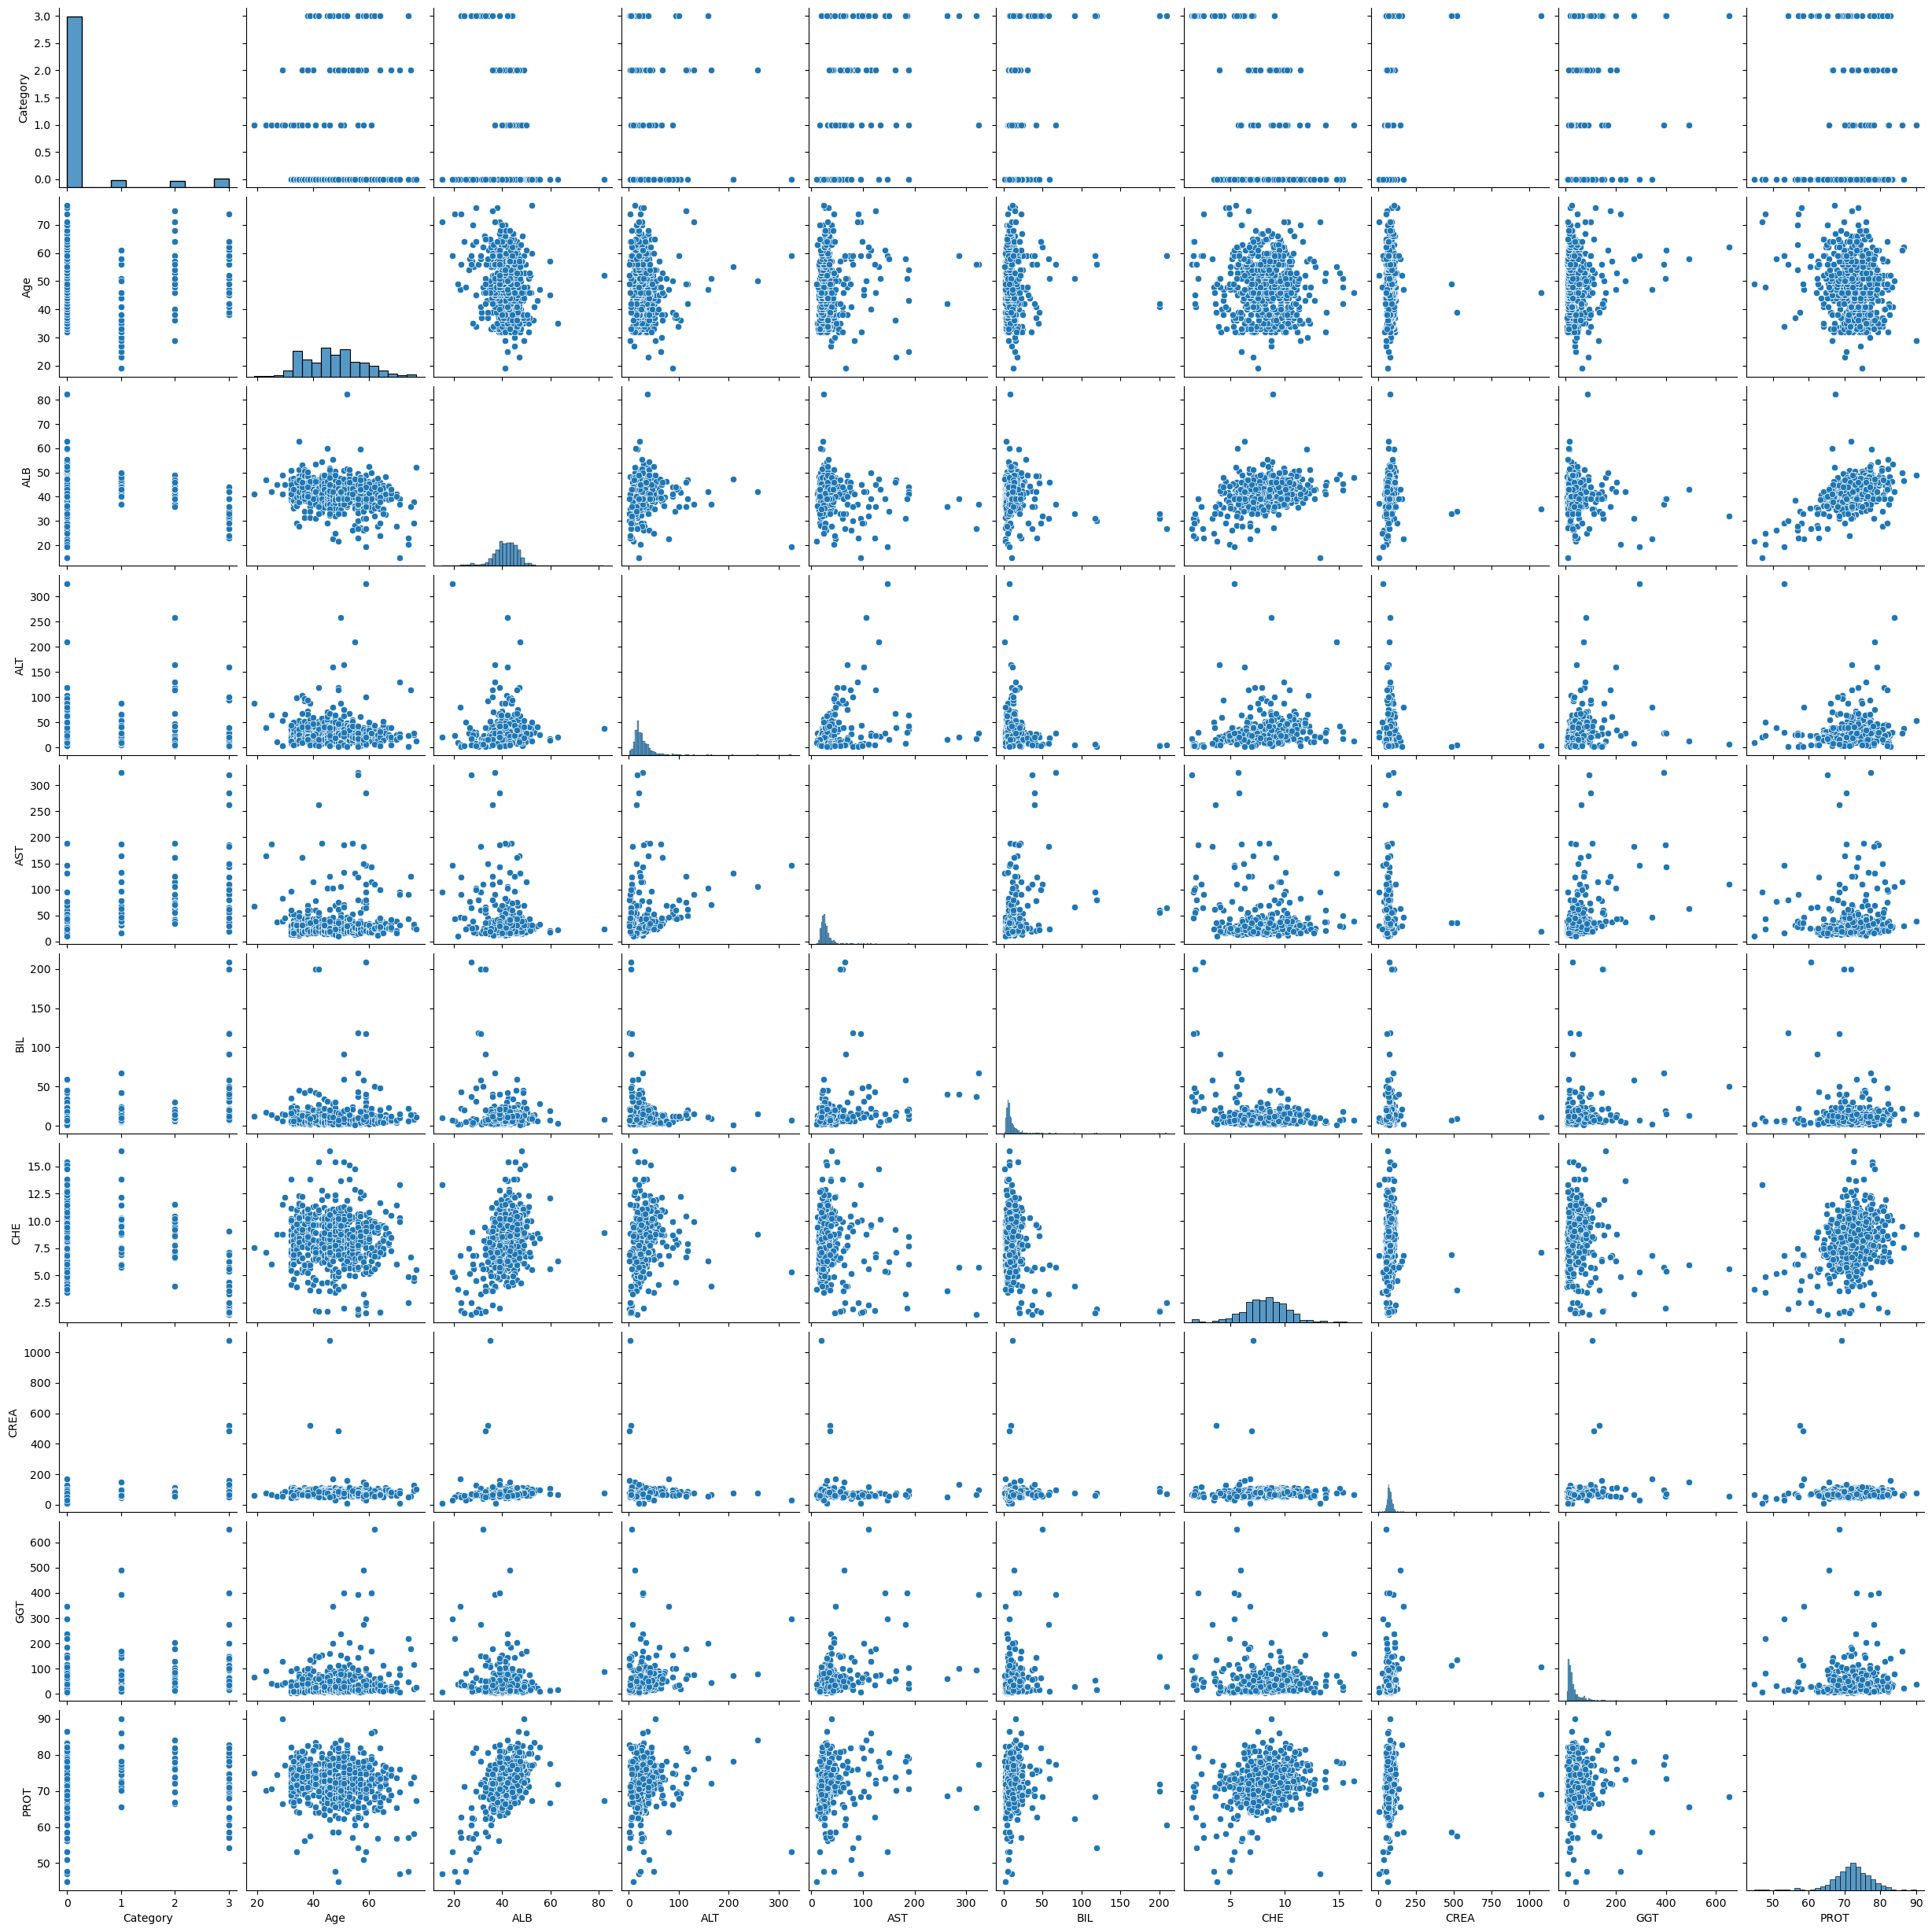

In [12]:
# Dropping the 'Sex' column from the DataFrame used for pair plot
df_pairplot = df.drop(columns=['Sex'])

# Creating the pair plot
g = sns.pairplot(df_pairplot)
plt.show()

# Findings 

The EDA findings revealed a negative correlation between the categorical variable and Albumin (ALB)/Cholinesterase (CHE). This correlation aligns with expectations, as the liver plays a pivotal role in synthesizing specific proteins and enzymes such as albumin and cholinesterase. In instances of liver damage, such as Hepatitis C infection, the liver progresses through stages of inflammation (Hepatitis), fibrosis, and ultimately cirrhosis, denoted by categories 1-3. As liver damage increases, there is a corresponding decrease in the levels of albumin and cholinesterase.

Furthermore, a positive correlation was observed between the categorical variable and Aspartate aminotransferase (AST)/Bilirubin (BIL). This correlation is clinically significant, as AST tends to leak into the bloodstream during liver damage. Elevated bilirubin levels are indicative of hepatic duct flow obstruction, commonly associated with liver damage.
